# **DATA UNDERSTANDING**

## **Context**

Sebuah toko yang bergerak di rental film ingin mengetahui secara umum gambaran bisnis yang telah berjalan dengan fokus utamanya yaitu store & staff toko tersebut. Pemilik toko ingin mendapatkan insight bagaimana meningkatkan kepuasan pelanggan dan menaikkan keuntungan toko dengan cara menyediakan jenis film yang tepat pada consumer yang tepat.

## **Database Information**

Sumber Database: https://dev.mysql.com/doc/sakila/en/

Database yang dimiliki mempunyai 15 tabel, yaitu:
- Actor         : Menyimpan informasi tentang aktor.
- Address       : Menyimpan informasi tentang alamat customer, toko, dan staff.
- Category      : Menyimpan informasi tentang kategori jenis film.
- City          : Menyimpan informasi kota dari alamat.
- Country       : Menyimpan informasi negara dari alamat.
- Customer      : Menyimpan informasi pelanggan yang menyewa film di rental film.
- Film          : Menyimpan informasi daftar film.
- Film_Actor    : Menyimpan informasi aktor bermain dalam film apa.
- Film_Text     : Menyimpan informasi text film.
- Inventory     : Menyimpan informasi inventory.
- Language      : Menyimpan informasi bahasa yang digunakan di film.
- Payment       : Menyimpan informasi pembayaran yang diterima toko rental film.
- Rental        : Menyimpan informasi penyewaan film.
- Staff         : Menyimpan informasi staff rental film.
- Store         : Menyimpan informasi toko rental film.

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

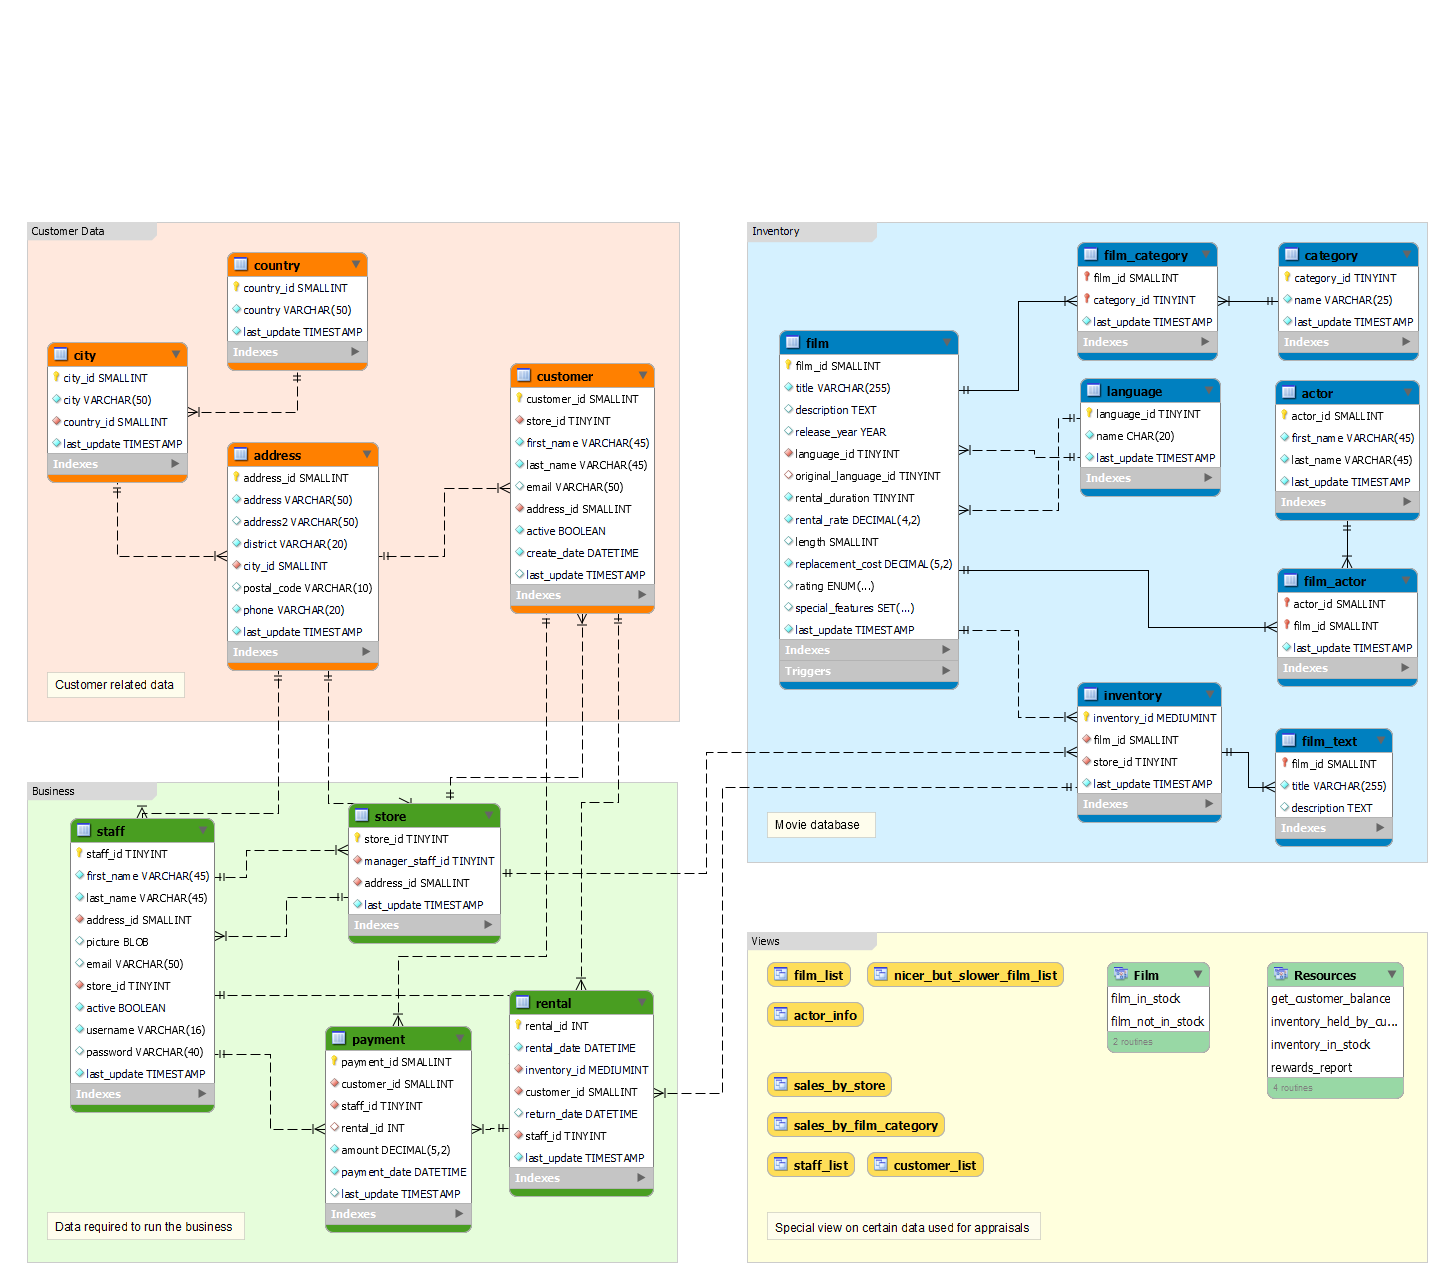

![](2021-12-28-07-00-35.png)

# **DATABASE**

## **Connecting To Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``sakila``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.


In [14]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon
import seaborn as sns

In [15]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = '12345',
    database = 'sakila'
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 2 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel.

In [16]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## **Data Detail & Keuntungan Transaksi**

Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 4 tabel, yaitu tabel ```Inventory```, ```Payment```, ```staff```, ```store```, ```address```, ```city```, dan ```country```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :
- rental_date dari tabel rental
- return_date dari tabel rental
- payment_date dari tabel payment
- rental_id dari tabel rental
- inventory_id dari tabel inventory
- title dari tabel film
- rental_duration dari tabel film
- rental_rate dari tabel film
- replacement_cost dari tabel film
- amount dari tabel payment
- first_name dari tabel staff
- last_name dari tabel staff
- store_id dari tabel store
- city dari tabel city
- country dari tabel country

Selain dari tabel, terdapat sebuah kolom juga yang dinamakan rent_duration yang merupakan selisih antara return_date (tanggal pengembalian) dan rental_date (tanggal penyewaan); 

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

In [17]:
# Query 1

tabel1 = sql_table (
    '''
select r.rental_date, r.return_date, p.payment_date, r.rental_id, i.inventory_id, f.film_id, f.title, c.name as category, f.rental_duration, f.rental_rate, f.replacement_cost, p.amount, staff.first_name, staff.last_name, store.store_id as store, city.city as store_city, country.country as store_country

from rental r
left join inventory i on r.inventory_id = i.inventory_id
left join film f on i.film_id = f.film_id
left join film_category fc on f.film_id = fc.film_id
left join category c on fc.category_id = c.category_id
left join payment p on r.rental_id = p.rental_id
left join staff on p.staff_id = staff.staff_id
left join store on store.store_id = staff.store_id
left join address on address.address_id = store.address_id
left join city on address.city_id = city.city_id
left join country on city.country_id = country.country_id
;
    '''
)
tabel1.set_index('rental_id',inplace=True)
tabel1

,rental_date,return_date,payment_date,inventory_id,film_id,title,category,rental_duration,rental_rate,replacement_cost,amount,first_name,last_name,store,store_city,store_country
rental_id,,,,,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,2005-05-24 22:53:30,367,80,BLANKET BEVERLY,Family,7,2.99,21.99,2.99,Mike,Hillyer,1,Lethbridge,Canada
2,2005-05-24 22:54:33,2005-05-28 19:40:33,2005-05-24 22:54:33,1525,333,FREAKY POCUS,Music,7,2.99,16.99,2.99,Jon,Stephens,2,Woodridge,Australia
3,2005-05-24 23:03:39,2005-06-01 22:12:39,2005-05-24 23:03:39,1711,373,GRADUATE LORD,Children,7,2.99,14.99,3.99,Jon,Stephens,2,Woodridge,Australia
4,2005-05-24 23:04:41,2005-06-03 01:43:41,2005-05-24 23:04:41,2452,535,LOVE SUICIDES,Horror,6,0.99,21.99,4.99,Mike,Hillyer,1,Lethbridge,Canada
5,2005-05-24 23:05:21,2005-06-02 04:33:21,2005-05-24 23:05:21,2079,450,IDOLS SNATCHERS,Children,5,2.99,29.99,6.99,Mike,Hillyer,1,Lethbridge,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16045,2005-08-23 22:25:26,2005-08-25 23:54:26,2005-08-23 22:25:26,772,168,COMANCHEROS ENEMY,Children,5,0.99,23.99,0.99,Mike,Hillyer,1,Lethbridge,Canada
16046,2005-08-23 22:26:47,2005-08-27 18:02:47,2005-08-23 22:26:47,4364,951,VOYAGE LEGALLY,Classics,6,0.99,28.99,0.99,Mike,Hillyer,1,Lethbridge,Canada
16047,2005-08-23 22:42:48,2005-08-25 02:48:48,2005-08-23 22:42:48,2088,452,ILLUSION AMELIE,Foreign,4,0.99,15.99,0.99,Mike,Hillyer,1,Lethbridge,Canada


In [18]:
tabel1['rental_date'].equals(tabel1['payment_date'])

True

dari data diatas kita bisa lihat bahwa nilai rental_date selalu sama dengan nilai payment_date. Yang menandakan bahwa pembayaran atau payment dilakukan di awal.

In [19]:
rent = sql_table(
'''
-- CTE for film_rented
with film_rented as (
	select sum(p.amount) as income, count(p.amount) as rented, i.film_id from 
	payment p
	left join rental r on p.rental_id = r.rental_id
	left join inventory i on r.inventory_id = i.inventory_id
	left join film f on i.film_id = f.film_id
	group by film_id
)

select f.film_id, f.title, f.release_year, f.rental_duration, f.rental_rate, f.length, f.replacement_cost, 
	f.last_update, c.name as category, sf.income, sf.rented
from film f
left join film_category fc on f.film_id = fc.film_id
left join category c on fc.category_id = c.category_id
left join film_list fl on f.film_id = fl.FID
left join language l on f.language_id = l.language_id
left join film_rented sf on f.film_id = sf.film_id; 
'''
)

rent.set_index('film_id', inplace = True)
rent.head(5)

,title,release_year,rental_duration,rental_rate,length,replacement_cost,last_update,category,income,rented
film_id,,,,,,,,,,
1,ACADEMY DINOSAUR,2006,6,0.99,86,20.99,2006-02-15 05:03:42,Documentary,36.77,23.0
2,ACE GOLDFINGER,2006,3,4.99,48,12.99,2006-02-15 05:03:42,Horror,52.93,7.0
3,ADAPTATION HOLES,2006,7,2.99,50,18.99,2006-02-15 05:03:42,Documentary,37.88,12.0
4,AFFAIR PREJUDICE,2006,5,2.99,117,26.99,2006-02-15 05:03:42,Horror,91.77,23.0
5,AFRICAN EGG,2006,6,2.99,130,22.99,2006-02-15 05:03:42,Family,51.88,12.0


In [20]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             1000 non-null   object        
 1   release_year      1000 non-null   int64         
 2   rental_duration   1000 non-null   int64         
 3   rental_rate       1000 non-null   object        
 4   length            1000 non-null   int64         
 5   replacement_cost  1000 non-null   object        
 6   last_update       1000 non-null   datetime64[ns]
 7   category          1000 non-null   object        
 8   income            958 non-null    object        
 9   rented            958 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 85.9+ KB


# **DATA MANIPULATION**

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```tabel1```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

## **Data Anomalies**

In [21]:
# Check Info Tabel1

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rental_date       16044 non-null  datetime64[ns]
 1   return_date       15861 non-null  datetime64[ns]
 2   payment_date      16044 non-null  datetime64[ns]
 3   inventory_id      16044 non-null  int64         
 4   film_id           16044 non-null  int64         
 5   title             16044 non-null  object        
 6   category          16044 non-null  object        
 7   rental_duration   16044 non-null  int64         
 8   rental_rate       16044 non-null  object        
 9   replacement_cost  16044 non-null  object        
 10  amount            16044 non-null  object        
 11  first_name        16044 non-null  object        
 12  last_name         16044 non-null  object        
 13  store             16044 non-null  int64         
 14  store_city        1604

In [22]:
# Check Info tabel rent

rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             1000 non-null   object        
 1   release_year      1000 non-null   int64         
 2   rental_duration   1000 non-null   int64         
 3   rental_rate       1000 non-null   object        
 4   length            1000 non-null   int64         
 5   replacement_cost  1000 non-null   object        
 6   last_update       1000 non-null   datetime64[ns]
 7   category          1000 non-null   object        
 8   income            958 non-null    object        
 9   rented            958 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 85.9+ KB


## **Melihat Data Sekilas Dari General Info**

Mari sejenak melihat apa yang ditampilkan pada general info yang disajikan di atas. Terlihat bahwa secara keseluruhan terdapat 16044 baris data dengan total 13 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Ada object, integer, dan float. Oke, mari sejenak mengesampingkan tipe data. Mari berforkus pada non-null values atau data yang tersedia pada setiap kolomnya. Jika melihat informasi tersebut, ada satu kolom yang memiliki data tidak lengkap. Selain dari itu, ada feature yang datanya juga missing, yang nantinya akan ditampilkan pada bagian berikutnya. **Kesimpulan pertama adalah bahwa terdapat *missing value* yang harus ditanggulangi.**

Fokus berikutnya adalah perhatikan pada features berikut ini: 
1. amount
2. rental_date
3. return_date
4. payment_date

Ada apa dengan tipe data tersebut? Mari kita cari tahu. Yang pertama pada tipe data amount. Feature ini merupakan feature yang seharusnya memiliki tipe data numerik (dibuktikan pada preview data di bagian sebelumnya), sedangkan yang terbaca tipe data dari  feature ini adalah object. Artinya, feature ini tidak dianggap memiliki komponen data yang numerik. Tentu saja hal tersebut harus ditanggulangi, mengingat ke depannya data yang bersifat numerik ini akan digunakan.

Yang kedua, yaitu pada features rental_date, return_date, dan payment_date. Ketiga feature ini sama seperti sebelumnya, masih dibaca sebagai object yang seharusnya merupakan tipe data ```datetime```. Oleh karena itu, kedua features ini juga harus ditanggulangi dengan cara mengubah tipe datanya. Dari kedua penjelasan tersebut, maka **kesimpulan keduanya adalah terdapat features yang memiliki tipe data yang salah dan harus diubah sesuai dengan tipe data seharusnya.**

In [23]:
# Check Missing Value Percentage tabel1

tabel1.isnull().sum()

rental_date           0
return_date         183
payment_date          0
inventory_id          0
film_id               0
title                 0
category              0
rental_duration       0
rental_rate           0
replacement_cost      0
amount                0
first_name            0
last_name             0
store                 0
store_city            0
store_country         0
dtype: int64

In [24]:
# Check Missing Value Percentage tebale rent

rent.isnull().sum()

title                0
release_year         0
rental_duration      0
rental_rate          0
length               0
replacement_cost     0
last_update          0
category             0
income              42
rented              42
dtype: int64

## **Missing Values**

Telah dijelaskan sebelumnya, terdapat feature yang memang memiliki missing values. yaitu return_date yang memiliki 183 missing value dari 16044 kolom. Mengapa hal tersebut terjadi? 

## **Handling Anomalies**

### Tabel1

Setelah mengetahui hal-hal yang harus 'dibereskan' terlebih dahulu, maka pada bagian ini, hal-hal tersebut harus diatasi. Pertama, masalah missing value. Sebenarnya pada bagian sebelumnya sudah diberi tahu apa saja yang harus dilakukan untuk mengatasi masalah tersebut.

Karena kolom yang mengandung missing value adalah return_date, ada 2 asumsi yang memungkinkan mengapa hal tersebut terjadi. Pertama memang ada kesalahan input data, dan yang kedua barang rental tersebut tidak dikembalikan.

Jadi disini kita mencoba untuk mengecek dahulu apa kah barang tersebut memang dikembalikan atau tidak.

In [25]:
tabel2=tabel1[tabel1['return_date'].isna()]
tabel2

,rental_date,return_date,payment_date,inventory_id,film_id,title,category,rental_duration,rental_rate,replacement_cost,amount,first_name,last_name,store,store_city,store_country
rental_id,,,,,,,,,,,,,,,,
11496,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,2047,445,HYDE DOCTOR,Classics,5,2.99,11.99,7.98,Jon,Stephens,2,Woodridge,Australia
11541,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,2026,440,HUNGER ROOF,Foreign,6,0.99,21.99,0.99,Jon,Stephens,2,Woodridge,Australia
11563,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,1545,338,FRISCO FORREST,Sci-Fi,6,4.99,23.99,4.99,Jon,Stephens,2,Woodridge,Australia
11577,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,4106,893,TITANS JERK,Sci-Fi,4,4.99,11.99,4.99,Mike,Hillyer,1,Lethbridge,Canada
11593,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,817,178,CONNECTION MICROCOSMOS,Comedy,6,0.99,25.99,0.99,Mike,Hillyer,1,Lethbridge,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15862,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,925,205,DANCES NONE,Action,3,0.99,22.99,0.99,Jon,Stephens,2,Woodridge,Australia
15867,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,837,183,CONVERSATION DOWNHILL,Family,4,4.99,14.99,4.99,Jon,Stephens,2,Woodridge,Australia
15875,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,3611,789,SHOCK CABIN,Foreign,7,2.99,15.99,2.99,Mike,Hillyer,1,Lethbridge,Canada


In [11]:
tabel2.to_csv('null_return_date1.csv')

In [26]:


data_rental = sql_table(
    '''
select * from rental
order by inventory_id, rental_id desc
;
    '''
)

data_rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,14714,2005-08-21 21:27:43,1,279,2005-08-30 22:26:43,1,2006-02-15 21:30:53
1,11433,2005-08-02 20:13:10,1,518,2005-08-11 21:35:10,1,2006-02-15 21:30:53
2,4863,2005-07-08 19:03:15,1,431,2005-07-11 21:29:15,2,2006-02-15 21:30:53
3,15453,2005-08-23 01:01:01,2,359,2005-08-30 20:08:01,1,2006-02-15 21:30:53
4,9449,2005-07-30 22:02:34,2,581,2005-08-06 02:09:34,1,2006-02-15 21:30:53


In [13]:
data_rental.to_csv('data_rental1.csv')

Setelah di teliti datanya, kekosongan data pada return_date menandakan bahwa barang tersebut belum dikembalikan. Jadi tidak perlu dilakukan penghapusan, tidak perlu merubah juga menjadi karakter lain karena akan mengubah tipe data return_date

In [14]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rental_date       16044 non-null  datetime64[ns]
 1   return_date       15861 non-null  datetime64[ns]
 2   payment_date      16044 non-null  datetime64[ns]
 3   inventory_id      16044 non-null  int64         
 4   film_id           16044 non-null  int64         
 5   title             16044 non-null  object        
 6   category          16044 non-null  object        
 7   rental_duration   16044 non-null  int64         
 8   rental_rate       16044 non-null  object        
 9   replacement_cost  16044 non-null  object        
 10  amount            16044 non-null  object        
 11  first_name        16044 non-null  object        
 12  last_name         16044 non-null  object        
 13  store             16044 non-null  int64         
 14  store_city        1604

### Tabel rent

Terdapat dua kolom yang miliki *missing values* yaitu `rented` dan `income`. 

Pada kolom `income` data yang memiliki missing values sebanyak 42 data (4.2%) hal ini dikarenakan tidak adanya data nilai penyewaan pada film tersebut, oleh karena itu nilai missing value akan diganti dengan nol (0) yang menenjukan bahwa tidak adanya hasil sewa dari film tersebut.

Sama seperti kolom `income`, kolom `rented` terdapat missing value karena tidak adanya data peminjam untuk film tersebut. Sehingga nilai missing value kita gantikan dengan nol (0).

In [27]:
# Mengganti nilai NaN pada kolom income dan rented dengan nilai nol (0)
rent['income'].fillna(0, inplace=True)
rent['rented'].fillna(0, inplace=True)

In [28]:
# cek missing value pada tabel rent
print('Missing Value in Actor Dataframe')
print(rent.isnull().sum())

Missing Value in Actor Dataframe
title               0
release_year        0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
last_update         0
category            0
income              0
rented              0
dtype: int64


## **Recheck Missing Value Information**

Setelah melakukan proses drop missing value, baik itu drop terhadap features maupun row, selanjutnya adalah melakukan pengecekan terhadap data yang dimiliki untuk memastikan apakah sudah tidak ada missing value lagi. Benar saja, jika melihat data pada output di atas, sudah tidak terdapat lagi missing value sama sekali(karena sudah di-drop). Untuk masing-masing feature juga sudah memiliki 0 missing value yang berarti masalah missing value sudah teratasi.

## **Mengubah Tipe Data Yang Salah**

### Tabel 1
Oke, telah disebutkan juga sebelumnya bahwa ada tipe data yang tidak sesuai. Kelima features tersebut terlebih dahulu diubah agar fungsionalitasnya kembali ke hakekatnya. Numerik akan diperlakukan sebagai tipe data numerik, begitu juga dengan tipe data datetime. Tujuannya tentu saja agar features tersebut dapat dipergunakan sebagaimana mestinya.

In [29]:
# Change Numeric 

tabel1['amount'] = pd.to_numeric(tabel1['amount'])
tabel1['rental_rate'] = pd.to_numeric(tabel1['rental_rate'])

In [30]:
# Recheck Info

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rental_date       16044 non-null  datetime64[ns]
 1   return_date       15861 non-null  datetime64[ns]
 2   payment_date      16044 non-null  datetime64[ns]
 3   inventory_id      16044 non-null  int64         
 4   film_id           16044 non-null  int64         
 5   title             16044 non-null  object        
 6   category          16044 non-null  object        
 7   rental_duration   16044 non-null  int64         
 8   rental_rate       16044 non-null  float64       
 9   replacement_cost  16044 non-null  object        
 10  amount            16044 non-null  float64       
 11  first_name        16044 non-null  object        
 12  last_name         16044 non-null  object        
 13  store             16044 non-null  int64         
 14  store_city        1604

### Tabel Rent

In [31]:
rent['replacement_cost'] = pd.to_numeric(rent['replacement_cost'])
rent['income']=pd.to_numeric(rent['income'])
rent['rented'] = pd.to_numeric(rent['rented'])

In [32]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             1000 non-null   object        
 1   release_year      1000 non-null   int64         
 2   rental_duration   1000 non-null   int64         
 3   rental_rate       1000 non-null   object        
 4   length            1000 non-null   int64         
 5   replacement_cost  1000 non-null   float64       
 6   last_update       1000 non-null   datetime64[ns]
 7   category          1000 non-null   object        
 8   income            1000 non-null   float64       
 9   rented            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 85.9+ KB


## **Recheck Data Information**

Bagian sebelumnya, 5 features yang memiliki tipe data yang salah sudah diubah ke dalam tipe data yang seharusnya. Untuk memastikannya, output di atas merupakan informasi umum yang kembali diperlihatkan untuk memastikan tipe data yang sudah diubah tersebut. Mari fokus ke kelima data yang sudah disebutkan sebelumnya. 

2 dari 5 features yang seharusnya bertipe data datetime, yaitu requiredDate dan shippedDate sudah menjadi tipe data datetime64, serta MSRP, buyPrice, dan juga profitEach juga yang awalnya bertipe data object sudah berubah menjadi float64. Dengan begini, perubahan yang dilakukan sebelumnya sudah terimplementasi dan anomali yang kedua sudah teratasi. 

In [33]:
# Check Dupliacate Tabel1

tabel1[tabel1.duplicated()]

,rental_date,return_date,payment_date,inventory_id,film_id,title,category,rental_duration,rental_rate,replacement_cost,amount,first_name,last_name,store,store_city,store_country
rental_id,,,,,,,,,,,,,,,,


In [34]:
# Check duplicate tabel rent

rent[rent.duplicated()]

,title,release_year,rental_duration,rental_rate,length,replacement_cost,last_update,category,income,rented
film_id,,,,,,,,,,


## **Data Duplicate**

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data saat ini, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

## **Feature 'staff_name'**

Pada dataframe staff terdapat dua kolom name yaitu first_name dan last_name, untuk memudahkan analisa kedua kolom ini akan digabung menjadi satu yaitu kolom name. Kolom name kemudian akan berisi nama lengkap dari setiap aktor yang ada di dalam film yang disewakan di toko.

In [35]:
tabel1['staff_name'] = tabel1['first_name']+' '+tabel1['last_name']

Kolom name yang baru menambahkan satu kolom pada tabel1. Dapat dilihat bahwa dengan adanya kolom name, kolom fist_name dan last_name tidak terlalu dibutuhkan karena memiliki isi yang sama, hal ini menunjukan adanya **data duplicate**. Oleh karena itu kolom first_name dan last_name akan dihapus dari tabel1.

In [36]:
tabel1.drop(['first_name','last_name'], axis = 1, inplace=True)
tabel1.sample(5)

,rental_date,return_date,payment_date,inventory_id,film_id,title,category,rental_duration,rental_rate,replacement_cost,amount,store,store_city,store_country,staff_name
rental_id,,,,,,,,,,,,,,,
10672,2005-08-01 17:10:54,2005-08-07 12:19:54,2005-08-01 17:10:54,3674,804,SLEEPING SUSPECTS,Horror,7,4.99,13.99,4.99,1,Lethbridge,Canada,Mike Hillyer
9742,2005-07-31 09:10:20,2005-08-08 10:07:20,2005-07-31 09:10:20,4058,884,TERMINATOR CLUB,Music,5,4.99,11.99,7.99,2,Woodridge,Australia,Jon Stephens
9888,2005-07-31 14:00:53,2005-08-08 18:51:53,2005-07-31 14:00:53,4400,962,WASTELAND DIVINE,Classics,7,2.99,18.99,3.99,1,Lethbridge,Canada,Mike Hillyer
8061,2005-07-28 17:12:53,2005-08-05 13:56:53,2005-07-28 17:12:53,650,141,CHICAGO NORTH,Games,6,4.99,11.99,6.99,2,Woodridge,Australia,Jon Stephens
13253,2005-08-19 16:53:56,2005-08-20 11:38:56,2005-08-19 16:53:56,472,103,BUCKET BROTHERHOOD,Travel,7,4.99,27.99,4.99,1,Lethbridge,Canada,Mike Hillyer


## **Feature 'rent_duration'**

Data awal menunjukan terdapat 3 features yang merupakan tipe data datetime. Artinya, kita dapat melakukan ekstraksi informasi tambahan dari kedua features tersebut. Sebelumnya, kita perlu tahu dulu definisi dari tabel tersebut. rental_date secara singkat dapat diartikan sebagai waktu atau kapan barang tersebut mulai disewa, sedangkat return_date adalah waktu dikembalikannya barang yang disewa tersebut. 

Melihat kedua definisi tersebut, sebuah informasi dapat diambil, yakni seberapa lama durasi peminjaman dari waktu mulai disewa hingga dikembalikan. Oleh karena itu, untuk mendapatkan informasinya, maka perlu dilakukan pengurangan antara return_date dan juga rental_date. Mungkin akan timbul pertanyaan, apakah waktu dapat dikurangkan? Jawabannya, bisa. Output yang keluar nantinya akan berupa selisih atau lamanya waktu proses tersebut dalam satuan hari.

In [38]:
# Add New Column (Processing Day)

tabel1['rent_duration'] = (tabel1['return_date'] - tabel1['rental_date']).dt.days
tabel1.sample(5)

,rental_date,return_date,payment_date,inventory_id,film_id,title,category,rental_duration,rental_rate,replacement_cost,amount,store,store_city,store_country,staff_name,rent_duration
rental_id,,,,,,,,,,,,,,,,
2755,2005-06-19 16:56:31,2005-06-27 12:02:31,2005-06-19 16:56:31,946,210,DARKO DORADO,Action,3,4.99,13.99,9.99,1,Lethbridge,Canada,Mike Hillyer,7.0
9808,2005-07-31 11:17:22,2005-08-07 15:54:22,2005-07-31 11:17:22,3259,717,REAR TRADING,Action,6,0.99,23.99,1.99,2,Woodridge,Australia,Jon Stephens,7.0
15050,2005-08-22 10:07:52,2005-08-23 04:45:52,2005-08-22 10:07:52,3961,863,SUN CONFESSIONS,Sci-Fi,5,0.99,9.99,0.99,1,Lethbridge,Canada,Mike Hillyer,0.0
8736,2005-07-29 18:31:15,2005-07-30 16:24:15,2005-07-29 18:31:15,1726,376,GRAPES FURY,Foreign,4,0.99,20.99,0.99,1,Lethbridge,Canada,Mike Hillyer,0.0
12477,2005-08-18 12:25:01,2005-08-25 17:25:01,2005-08-18 12:25:01,4516,986,WONKA SEA,Animation,6,2.99,24.99,3.99,2,Woodridge,Australia,Jon Stephens,7.0


## **Unique Value 'rent_duration'**

Oke, setelah membuat sebuah kolom baru yang bernama ProcessingDate sebagaimana yang sudah didefinisikan sebelumnya, mari kita cek bagaimana data tersebut. Jika melihat dari preview output sebelumnya, tidak ada keanehan. Lantas bagaimana jika kita melihat lebih dalam ke dalam feature baru ini? Berikut ini penampakan hasil yang memperlihatkan unique values beserta jumlah data di setiap unique values-nya.

In [39]:
# Check Data Anomalies in Date Time Fomrat

tabel1['rent_duration'].value_counts()

7.0    1832
1.0    1829
8.0    1771
5.0    1767
6.0    1758
4.0    1757
2.0    1713
3.0    1694
9.0     894
0.0     846
Name: rent_duration, dtype: int64

In [40]:
tabel1['rent_year'] = pd.to_datetime(tabel1['payment_date']).dt.year
tabel1['rent_month'] = pd.to_datetime(tabel1['payment_date']).dt.month
tabel1['rent_date'] = pd.to_datetime(tabel1['payment_date']).dt.day

In [41]:
tabel1

,rental_date,return_date,payment_date,inventory_id,film_id,title,category,rental_duration,rental_rate,replacement_cost,amount,store,store_city,store_country,staff_name,rent_duration,rent_year,rent_month,rent_date
rental_id,,,,,,,,,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,2005-05-24 22:53:30,367,80,BLANKET BEVERLY,Family,7,2.99,21.99,2.99,1,Lethbridge,Canada,Mike Hillyer,1.0,2005,5,24
2,2005-05-24 22:54:33,2005-05-28 19:40:33,2005-05-24 22:54:33,1525,333,FREAKY POCUS,Music,7,2.99,16.99,2.99,2,Woodridge,Australia,Jon Stephens,3.0,2005,5,24
3,2005-05-24 23:03:39,2005-06-01 22:12:39,2005-05-24 23:03:39,1711,373,GRADUATE LORD,Children,7,2.99,14.99,3.99,2,Woodridge,Australia,Jon Stephens,7.0,2005,5,24
4,2005-05-24 23:04:41,2005-06-03 01:43:41,2005-05-24 23:04:41,2452,535,LOVE SUICIDES,Horror,6,0.99,21.99,4.99,1,Lethbridge,Canada,Mike Hillyer,9.0,2005,5,24
5,2005-05-24 23:05:21,2005-06-02 04:33:21,2005-05-24 23:05:21,2079,450,IDOLS SNATCHERS,Children,5,2.99,29.99,6.99,1,Lethbridge,Canada,Mike Hillyer,8.0,2005,5,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16045,2005-08-23 22:25:26,2005-08-25 23:54:26,2005-08-23 22:25:26,772,168,COMANCHEROS ENEMY,Children,5,0.99,23.99,0.99,1,Lethbridge,Canada,Mike Hillyer,2.0,2005,8,23
16046,2005-08-23 22:26:47,2005-08-27 18:02:47,2005-08-23 22:26:47,4364,951,VOYAGE LEGALLY,Classics,6,0.99,28.99,0.99,1,Lethbridge,Canada,Mike Hillyer,3.0,2005,8,23
16047,2005-08-23 22:42:48,2005-08-25 02:48:48,2005-08-23 22:42:48,2088,452,ILLUSION AMELIE,Foreign,4,0.99,15.99,0.99,1,Lethbridge,Canada,Mike Hillyer,1.0,2005,8,23


## **Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [42]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rental_date       16044 non-null  datetime64[ns]
 1   return_date       15861 non-null  datetime64[ns]
 2   payment_date      16044 non-null  datetime64[ns]
 3   inventory_id      16044 non-null  int64         
 4   film_id           16044 non-null  int64         
 5   title             16044 non-null  object        
 6   category          16044 non-null  object        
 7   rental_duration   16044 non-null  int64         
 8   rental_rate       16044 non-null  float64       
 9   replacement_cost  16044 non-null  object        
 10  amount            16044 non-null  float64       
 11  store             16044 non-null  int64         
 12  store_city        16044 non-null  object        
 13  store_country     16044 non-null  object        
 14  staff_name        1604

In [44]:
tabel1[tabel1['return_date'].isna()]

,rental_date,return_date,payment_date,inventory_id,film_id,title,category,rental_duration,rental_rate,replacement_cost,amount,store,store_city,store_country,staff_name,rent_duration,rent_year,rent_month,rent_date
rental_id,,,,,,,,,,,,,,,,,,,
11496,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,2047,445,HYDE DOCTOR,Classics,5,2.99,11.99,7.98,2,Woodridge,Australia,Jon Stephens,NaN,2006,2,14
11541,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,2026,440,HUNGER ROOF,Foreign,6,0.99,21.99,0.99,2,Woodridge,Australia,Jon Stephens,NaN,2006,2,14
11563,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,1545,338,FRISCO FORREST,Sci-Fi,6,4.99,23.99,4.99,2,Woodridge,Australia,Jon Stephens,NaN,2006,2,14
11577,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,4106,893,TITANS JERK,Sci-Fi,4,4.99,11.99,4.99,1,Lethbridge,Canada,Mike Hillyer,NaN,2006,2,14
11593,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,817,178,CONNECTION MICROCOSMOS,Comedy,6,0.99,25.99,0.99,1,Lethbridge,Canada,Mike Hillyer,NaN,2006,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15862,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,925,205,DANCES NONE,Action,3,0.99,22.99,0.99,2,Woodridge,Australia,Jon Stephens,NaN,2006,2,14
15867,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,837,183,CONVERSATION DOWNHILL,Family,4,4.99,14.99,4.99,2,Woodridge,Australia,Jon Stephens,NaN,2006,2,14
15875,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,3611,789,SHOCK CABIN,Foreign,7,2.99,15.99,2.99,1,Lethbridge,Canada,Mike Hillyer,NaN,2006,2,14


rent_duration nan saat return_date nan. Jadi tidak ada masalah dalam hal ini.

In [45]:
# Clean Data

tabel1.sample(20)

,rental_date,return_date,payment_date,inventory_id,film_id,title,category,rental_duration,rental_rate,replacement_cost,amount,store,store_city,store_country,staff_name,rent_duration,rent_year,rent_month,rent_date
rental_id,,,,,,,,,,,,,,,,,,,
5539,2005-07-10 02:42:58,2005-07-16 02:27:58,2005-07-10 02:42:58,3217,707,QUEST MUSSOLINI,Action,5,2.99,29.99,3.99,2,Woodridge,Australia,Jon Stephens,5.0,2005,7,10
3154,2005-06-20 20:44:40,2005-06-23 19:10:40,2005-06-20 20:44:40,3195,702,PULP BEVERLY,Horror,4,2.99,12.99,2.99,1,Lethbridge,Canada,Mike Hillyer,2.0,2005,6,20
8908,2005-07-30 01:26:05,2005-07-31 20:39:05,2005-07-30 01:26:05,4498,982,WOMEN DORADO,Action,4,0.99,23.99,0.99,1,Lethbridge,Canada,Mike Hillyer,1.0,2005,7,30
9038,2005-07-30 06:23:35,2005-08-06 11:10:35,2005-07-30 06:23:35,217,49,BADMAN DAWN,Sci-Fi,6,2.99,22.99,3.99,1,Lethbridge,Canada,Mike Hillyer,7.0,2005,7,30
8837,2005-07-29 22:49:00,2005-08-07 21:56:00,2005-07-29 22:49:00,42,9,ALABAMA DEVIL,Horror,3,2.99,21.99,8.99,2,Woodridge,Australia,Jon Stephens,8.0,2005,7,29
1643,2005-06-16 08:55:35,2005-06-21 05:36:35,2005-06-16 08:55:35,1352,298,EYES DRIVING,Sci-Fi,4,2.99,13.99,3.99,2,Woodridge,Australia,Jon Stephens,4.0,2005,6,16
15465,2005-08-23 01:16:33,2005-08-28 20:08:33,2005-08-23 01:16:33,362,79,BLADE POLISH,Drama,5,0.99,10.99,0.99,1,Lethbridge,Canada,Mike Hillyer,5.0,2005,8,23
12921,2005-08-19 04:47:48,2005-08-25 00:07:48,2005-08-19 04:47:48,781,170,COMMAND DARLING,Foreign,5,4.99,28.99,5.99,1,Lethbridge,Canada,Mike Hillyer,5.0,2005,8,19
7407,2005-07-27 16:29:04,2005-08-01 17:47:04,2005-07-27 16:29:04,3093,680,PINOCCHIO SIMON,Comedy,4,4.99,21.99,5.99,2,Woodridge,Australia,Jon Stephens,5.0,2005,7,27


In [46]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rental_date       16044 non-null  datetime64[ns]
 1   return_date       15861 non-null  datetime64[ns]
 2   payment_date      16044 non-null  datetime64[ns]
 3   inventory_id      16044 non-null  int64         
 4   film_id           16044 non-null  int64         
 5   title             16044 non-null  object        
 6   category          16044 non-null  object        
 7   rental_duration   16044 non-null  int64         
 8   rental_rate       16044 non-null  float64       
 9   replacement_cost  16044 non-null  object        
 10  amount            16044 non-null  float64       
 11  store             16044 non-null  int64         
 12  store_city        16044 non-null  object        
 13  store_country     16044 non-null  object        
 14  staff_name        1604

In [47]:
# Clean data

rent.sample(20)

,title,release_year,rental_duration,rental_rate,length,replacement_cost,last_update,category,income,rented
film_id,,,,,,,,,,
181,CONTACT ANONYMOUS,2006,7,2.99,166,10.99,2006-02-15 05:03:42,Travel,85.74,26.0
460,INNOCENT USUAL,2006,3,4.99,178,26.99,2006-02-15 05:03:42,Foreign,191.74,26.0
446,HYSTERICAL GRAIL,2006,5,4.99,150,19.99,2006-02-15 05:03:42,Sports,87.85,15.0
980,WIZARD COLDBLOODED,2006,4,4.99,75,12.99,2006-02-15 05:03:42,Music,97.84,16.0
942,VIETNAM SMOOCHY,2006,7,0.99,174,27.99,2006-02-15 05:03:42,Drama,22.85,15.0
547,MAGIC MALLRATS,2006,3,0.99,117,19.99,2006-02-15 05:03:42,Children,17.93,7.0
307,FELLOWSHIP AUTUMN,2006,6,4.99,77,9.99,2006-02-15 05:03:42,Travel,149.74,26.0
389,GUNFIGHTER MUSSOLINI,2006,3,2.99,127,9.99,2006-02-15 05:03:42,Sports,68.88,12.0
659,PARK CITIZEN,2006,3,4.99,109,14.99,2006-02-15 05:03:42,Action,60.92,8.0


In [48]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             1000 non-null   object        
 1   release_year      1000 non-null   int64         
 2   rental_duration   1000 non-null   int64         
 3   rental_rate       1000 non-null   object        
 4   length            1000 non-null   int64         
 5   replacement_cost  1000 non-null   float64       
 6   last_update       1000 non-null   datetime64[ns]
 7   category          1000 non-null   object        
 8   income            1000 non-null   float64       
 9   rented            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 85.9+ KB


## **General Info Cleaned Data**

In [49]:
# Check Some Info

listItem = []
for col in tabel1.columns :
    listItem.append([col, tabel1[col].dtype, len(tabel1),tabel1[col].isna().sum(), round((tabel1[col].isna().sum()/len(tabel1[col])) * 100,2),
                    tabel1[col].nunique(), list(tabel1[col].drop_duplicates().sample(2).values)])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,rental_date,datetime64[ns],16044,0,0.00,15815,"[2005-08-23T15:45:42.000000000, 2005-07-31T07:..."
1,return_date,datetime64[ns],16044,183,1.14,15836,"[2005-08-23T16:59:41.000000000, 2005-08-25T04:..."
2,payment_date,datetime64[ns],16044,0,0.00,15815,"[2005-07-06T23:11:11.000000000, 2005-08-17T22:..."
3,inventory_id,int64,16044,0,0.00,4580,"[183, 348]"
4,film_id,int64,16044,0,0.00,958,"[519, 250]"
5,title,object,16044,0,0.00,958,"[FATAL HAUNTED, SEA VIRGIN]"
6,category,object,16044,0,0.00,16,"[Sci-Fi, Horror]"
7,rental_duration,int64,16044,0,0.00,5,"[6, 4]"
8,rental_rate,float64,16044,0,0.00,3,"[4.99, 2.99]"
9,replacement_cost,object,16044,0,0.00,21,"[23.99, 29.99]"


## Distribusi

<AxesSubplot:xlabel='rent_duration', ylabel='Count'>

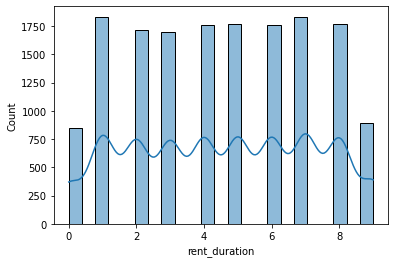

In [50]:
# menampilkan distribusi vaiabel Rent_duration
sns.histplot(tabel1['rent_duration'],kde=True)

In [51]:
from scipy.stats import normaltest

normaltest(tabel1['rent_duration'])

NormaltestResult(statistic=nan, pvalue=nan)

## **Data Outlier**

In [52]:
# Outlier Check With Function

Q1_amount = tabel1['amount'].describe()['25%']
Q3_amount = tabel1['amount'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = tabel1[(tabel1['amount'] < Q1_amount - (1.5 * iqr)) | (tabel1['amount']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = tabel1[(tabel1['amount'] > Q1_amount - (1.5 * iqr)) & (tabel1['amount']< Q3_amount + (1.5 * iqr)) ].index
tabel1.loc[outlier_index].sort_values(by=['amount'])

,rental_date,return_date,payment_date,inventory_id,film_id,title,category,rental_duration,rental_rate,replacement_cost,amount,store,store_city,store_country,staff_name,rent_duration,rent_year,rent_month,rent_date
rental_id,,,,,,,,,,,,,,,,,,,
13534,2006-02-14 15:16:03,NaT,2006-02-14 15:16:03,2476,542,LUST LOCK,Action,3,2.99,28.99,8.97,2,Woodridge,Australia,Jon Stephens,NaN,2006,2,14
8859,2005-07-29 23:44:43,2005-08-07 18:14:43,2005-07-29 23:44:43,603,131,CENTER DINOSAUR,Classics,5,4.99,12.99,8.99,2,Woodridge,Australia,Jon Stephens,8.0,2005,7,29
8919,2005-07-30 01:57:03,2005-08-08 05:14:03,2005-07-30 01:57:03,4006,872,SWEET BROTHERHOOD,Travel,3,2.99,27.99,8.99,2,Woodridge,Australia,Jon Stephens,9.0,2005,7,30
8951,2005-07-30 03:18:24,2005-08-08 08:50:24,2005-07-30 03:18:24,127,25,ANGELS LIFE,New,3,2.99,15.99,8.99,2,Woodridge,Australia,Jon Stephens,9.0,2005,7,30
8959,2005-07-30 03:35:49,2005-08-06 02:02:49,2005-07-30 03:35:49,3508,768,SCARFACE BANG,Children,3,4.99,11.99,8.99,1,Lethbridge,Canada,Mike Hillyer,6.0,2005,7,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,2005-06-17 23:51:21,2005-06-27 01:06:21,2005-06-17 23:51:21,4343,946,VIRTUAL SPOILERS,Family,3,4.99,14.99,11.99,1,Lethbridge,Canada,Mike Hillyer,9.0,2005,6,17
14763,2005-08-21 23:34:00,2005-08-31 03:58:00,2005-08-21 23:34:00,1480,324,FLINTSTONES HAPPINESS,Comedy,3,4.99,11.99,11.99,2,Woodridge,Australia,Jon Stephens,9.0,2005,8,21
14759,2005-08-21 23:28:58,2005-08-31 00:35:58,2005-08-21 23:28:58,3871,846,STING PERSONAL,New,3,4.99,9.99,11.99,1,Lethbridge,Canada,Mike Hillyer,9.0,2005,8,21


# **DATA VISUALIZATION & STATISTICS**

In [53]:
tabel1.to_csv('tes.csv]]')

In [54]:
rent.sample(5)

,title,release_year,rental_duration,rental_rate,length,replacement_cost,last_update,category,income,rented
film_id,,,,,,,,,,
88,BORN SPINAL,2006,7,4.99,179,17.99,2006-02-15 05:03:42,Travel,59.88,12.0
209,DARKNESS WAR,2006,6,2.99,99,24.99,2006-02-15 05:03:42,Drama,48.87,13.0
575,MIDSUMMER GROUNDHOG,2006,3,4.99,48,27.99,2006-02-15 05:03:42,Documentary,156.78,22.0
691,POSEIDON FOREVER,2006,6,4.99,159,29.99,2006-02-15 05:03:42,Sports,100.83,17.0
468,INVASION CYCLONE,2006,5,2.99,97,12.99,2006-02-15 05:03:42,Children,103.73,27.0


In [55]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='title'>

<Figure size 864x432 with 0 Axes>

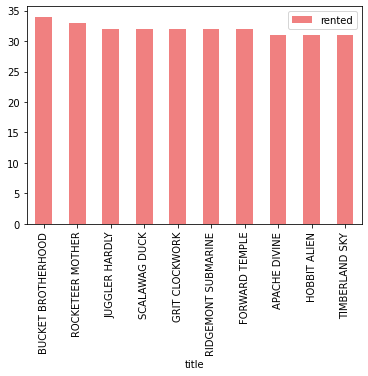

In [56]:
# 10 film dengan jumlah penyewaan terbanyak
plt.figure(figsize=(12,6))
rent.sort_values(by='rented', ascending=False).head(10)[['title','rented']].plot(kind='bar', x='title',color='lightcoral')

<AxesSubplot:xlabel='title'>

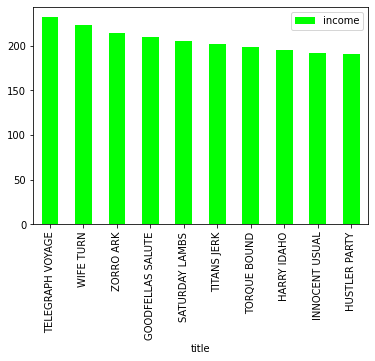

In [57]:
# 10 film yang menghasilkan total pendapatan dari penyewaan terbesar

rent.sort_values(by='income', ascending=False).head(10)[['title','income']].plot(kind='bar', x='title',color='lime')

In [58]:
# 5 Kategori film yang paling sering disewa


a.sort_values(by='rented', ascending=False).head(5)[['category','rented']].plot(kind='bar', x='category',color='lime')

NameError: name 'a' is not defined

In [ ]:
# 5 Kategori film yang paling sering disewa

rent.sort_values(by='income', ascending=False).head(5)[['category','income']].plot(kind='bar', x='category',color='lime')

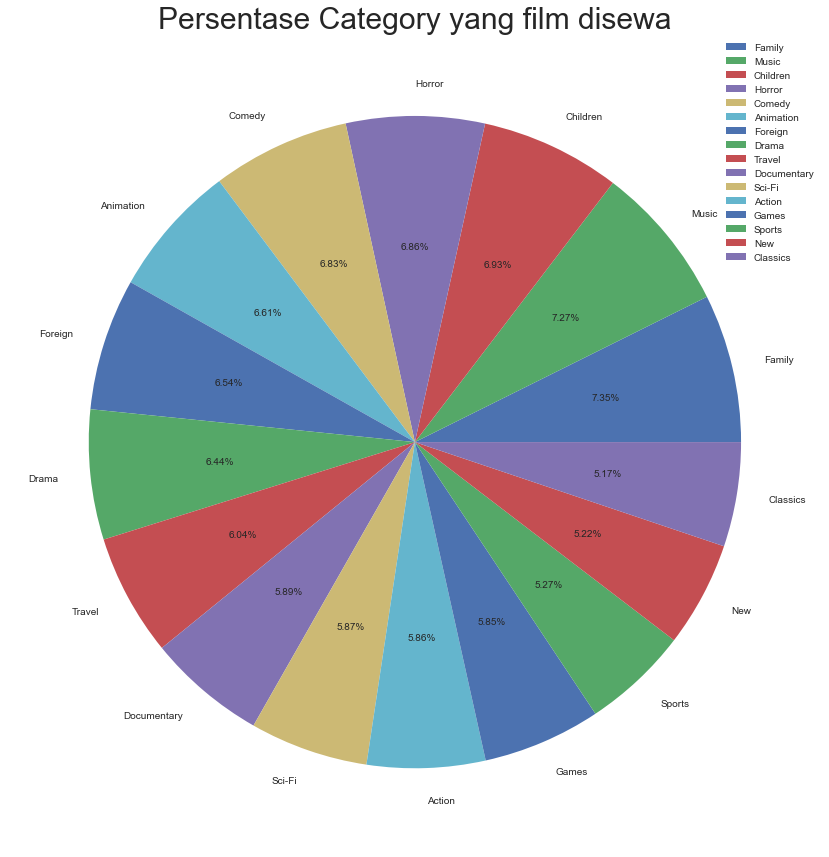

In [59]:
# Pie Chart Status

plt.style.use('seaborn')
plt.figure(figsize=(20,15))
plt.pie(tabel1['category'].value_counts().values, 
        autopct='%.2f%%',labels=tabel1['category'].unique())
plt.title ('Persentase Category yang film disewa', size = 30)
plt.legend(tabel1['category'].unique())
plt.show()

# **Statiscts**

In [60]:
# Uji Normalitas Nilai Hasil Sewa (amount)

from scipy.stats import shapiro

norm, pval = shapiro(tabel1['amount'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Data tidak berdistribusi normal')
else :
    print (f'Terima H0 Karena P-Value ({pval} > 5%)')
    print ('Data berdistribusi normal')


Tolak H0 Karena P-Value (0.0 < 5%)
Data tidak berdistribusi normal


C:\Users\farha\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [61]:
# Uji Normalitas Banyaknya Sewa (rented)

from scipy.stats import shapiro

norm, pval = shapiro(tabel1['rent_month'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Data tidak berdistribusi normal')
else :
    print (f'Terima H0 Karena P-Value ({pval} > 5%)')
    print ('Data berdistribusi normal')


Tolak H0 Karena P-Value (0.0 < 5%)
Data tidak berdistribusi normal


In [62]:
# Uji Normalitas Banyaknya Sewa (rented)

from scipy.stats import shapiro

norm, pval = shapiro(tabel1['rent_year'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Data tidak terdistribusi normal')
else :
    print (f'Terima H0 Karena P-Value ({pval} > 5%)')
    print ('Data berdistribusi normal')


Tolak H0 Karena P-Value (0.0 < 5%)
Data tidak terdistribusi normal


<AxesSubplot:>

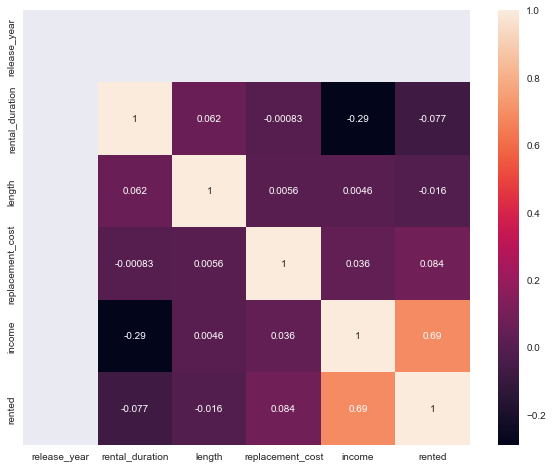

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(rent.corr(), annot=True)

<AxesSubplot:>

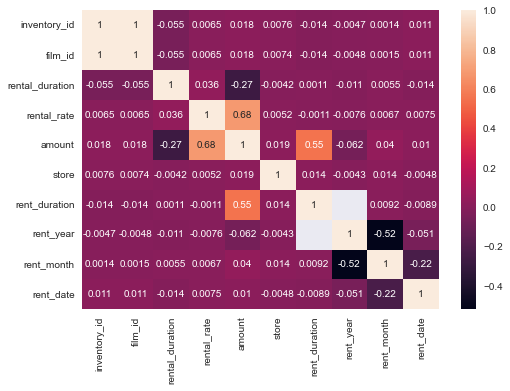

In [64]:
sns.heatmap(tabel1.corr(),annot=True)